# Overfitting - regularyzacja

## Regularyzacja dla regresji liniowej

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('lin_reg_training.csv', names=['x', 'y'])
df_test = pd.read_csv('lin_reg_test.csv', names=['x', 'y'])

X_train = np.array(df_train['x'])
y_train = np.array(df_train['y'])

X_test = np.array(df_test['x'])
y_test = np.array(df_test['y'])

In [53]:
# Funkcje z poprzednich zajęć
def h_fun(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: 
    '''
    return theta.T @ X
def h_fun_poly(X, theta):
    """
    Calculate hypothesis function value for polynomial regression.

    :param X: ndarray of shape (n+1, m), input features.
    :param theta: ndarray of shape (n+1, 1), parameters.
    :return: ndarray of shape (1, m), hypothesis function value.
    """
    # Construct polynomial features up to the 6th degree
    X_poly = np.vstack([X, X[1:]**2, X[1:]**3, X[1:]**4, X[1:]**5, X[1:]**6])
    print(X_poly.shape)
    # Calculate hypothesis function value
    return theta.T @ X_poly
def calculate_cost(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    m = y.shape[1]
    fx = h_fun(X, theta)
    res = (1/(2*m)) * np.sum((fx - y) ** 2)
    return res

def gradient(X, y, theta, alpha, eps):
    """   
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :param alpha: learning rate
    :param eps: epsilon - akceptowalna różnica dla kolejnych wartości funkcji kosztu
    :return: 
    """
    m = y.shape[1]
    while True:
        # Pochodne cząstkowe funkcji kosztu
        h_y_diff = (h_fun_poly(X, theta) - y)
        gradient = h_y_diff @ X.T
        new_theta = theta - alpha * gradient.T / m
        
        # Obliczenie funkcji kosztu
        new_cost = calculate_cost(X, y, new_theta)
        prev_cost = calculate_cost(X, y, theta)
        
        # Sprawdzenie warunku zakończenia
        if np.abs(new_cost - prev_cost) < eps:
            break
        else:
            theta = new_theta
            
    return theta

# Regularization functions

def calculate_cost_reg(X, y, theta, lambda_):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    m = y.shape[1]
    fx = h_fun(X, theta)
    res = (1/(2*m)) * np.sum((fx - y) ** 2)
    sum_of_thetas = (theta[1:,:] ** 2).sum()
    return res + sum_of_thetas * lambda_ / (2 * m)

def gradient_reg(X, y, theta, alpha, eps, lambda_):
    """   
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :param alpha: learning rate
    :param eps: epsilon - akceptowalna różnica dla kolejnych wartości funkcji kosztu
    :return: 
    """
    m = y.shape[1]
    while True:
        # Pochodne cząstkowe funkcji kosztu
        h_y_diff = (h_fun(X, theta) - y)
        gradient = (h_y_diff @ X.T).reshape(-1, 1)
        theta_reg = np.concatenate([np.zeros((1, 1)), theta[1:, :]], axis=0)
        new_theta = theta - alpha * (gradient + lambda_ * theta_reg) / m
        
        # Obliczenie funkcji kosztu
        new_cost = calculate_cost_reg(X, y, new_theta, lambda_)
        prev_cost = calculate_cost_reg(X, y, theta, lambda_)
        
        # Sprawdzenie warunku zakończenia
        if np.abs(new_cost - prev_cost) < eps:
            break
        else:
            theta = new_theta
            
    return theta


**1. Proszę przedstawić punkty pomiarowe na płaszczyźnie**

<AxesSubplot: xlabel='x', ylabel='y'>

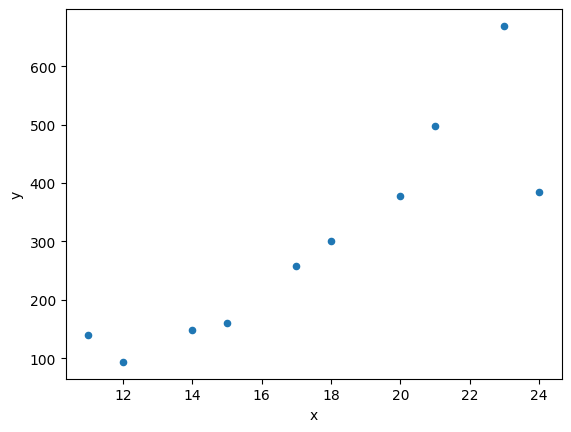

In [4]:
df_train.plot(kind='scatter', x='x', y='y')

**2. Proszę dokonać skalowania danych, np. używając klasy StandardScaler z biblioteki scikit-learn.**

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

standard_scaler = StandardScaler()

X_train = standard_scaler.fit_transform(X_train.reshape(-1, 1))
X_test = standard_scaler.transform(X_test.reshape(-1, 1))

**Proszę poszerzyć dostępne cechy kombinacjami nieliniowymi aż do potęgi 6-tego stopnia. Do tego celu można zastosować odpowiednie narzędzie z sklearn:**

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=6)

X_train = poly_features.fit_transform(X_train.reshape(-1,1))

In [54]:

theta = np.zeros((X_train.shape[1], 1))
eps = 1e-7
alpha = 0.02
theta = gradient(X_train.T, y_train.reshape(1, -1), theta, alpha, eps)
# X_train_range = np.linspace(X_train.min(), X_train.max(), 1000).reshape(-1, 1)
h = h_fun(X_train.T, theta)
cost = calculate_cost(X_train.T, y_train.reshape(1, -1), theta)
theta,cost

(37, 10)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 37 is different from 7)

In [ ]:
plt.scatter(X_train.T[1], y_train)
plt.plot(X_train.T[1], h.T, 'r-')
plt.scatter(X_test.T, y_test)

**4. Obliczanie dla różnych wartości lambda**

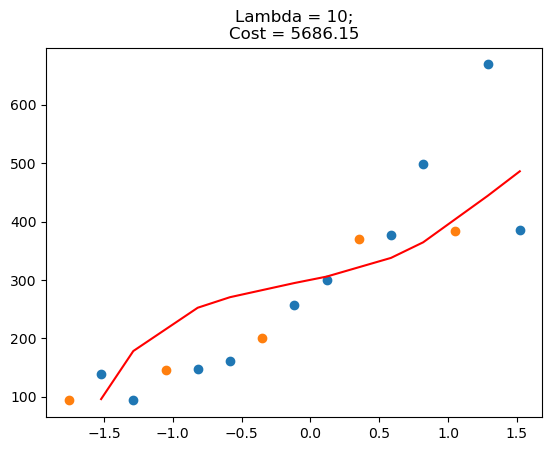

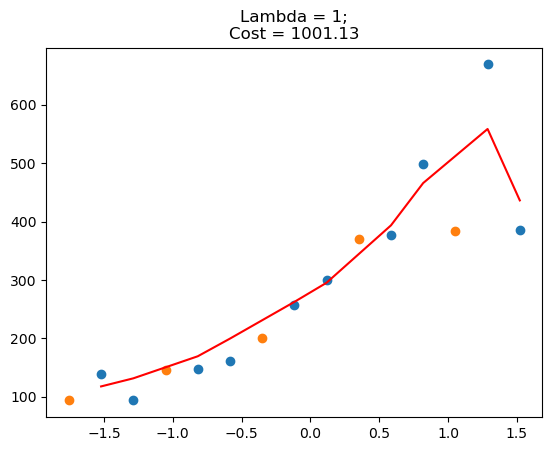

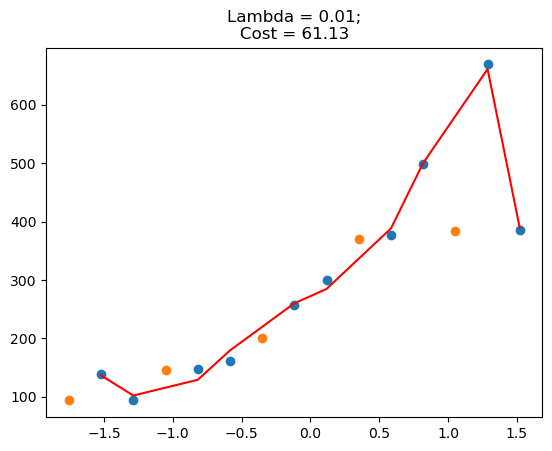

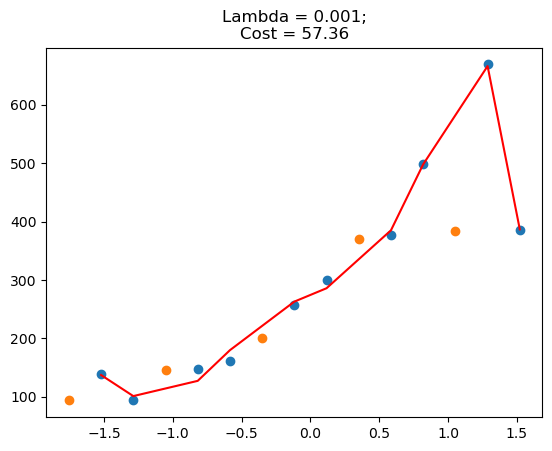

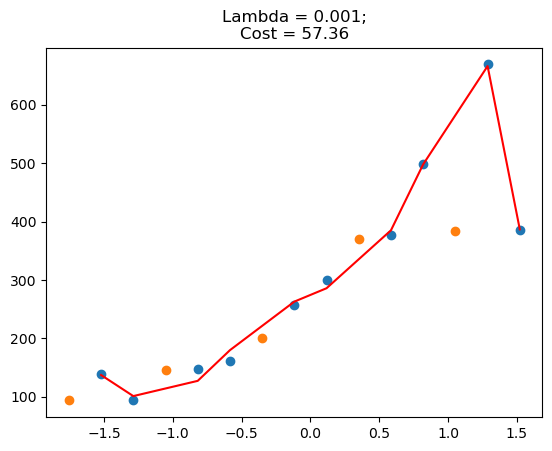

In [138]:
lambda_values = [10, 1, 0.01, 0.001, 0.001]
eps = 1e-10
alpha = 0.001

for lbd in lambda_values:
    theta = np.zeros((X_train.shape[1], 1))
    theta = gradient_reg(X_train.T, y_train.reshape(1, -1), theta, alpha, eps, lbd)
    h = h_fun(X_train.T, theta)
    cost = calculate_cost_reg(X_train.T, y_train.reshape(1, -1), theta, 0)
    plt.scatter(X_train.T[1], y_train)
    plt.plot(X_train.T[1], h.T, 'r-')
    plt.scatter(X_test.T, y_test)
    plt.title(f'Lambda = {lbd};\nCost = {cost:.2f}')
    plt.show()

## Regularyzacja dla regresji logistycznej

In [ ]:
df_train = pd.read_csv('datasets/logi_reg_training.csv', names=['x', 'y'])
df_test = pd.read_csv('datasets/logi_reg_test.csv', names=['x', 'y'])

X_train = np.array(df_train['x'])
y_train = np.array(df_train['y'])

X_test = np.array(df_test['x'])
y_test = np.array(df_test['y'])